# Probability 2 (Data science Master, University of Lille) / CMF, (Centrale Lille, G3 SDIA)

---

## Lab 1 - Discrete time homogeneous Markov chains

---

## Guidelines (read carefully before starting)

**Objectives**: numerically simulate basic Markov chains (discrete time and discrete state space).

**Setup**: after retrieving the resources for the lab on moodle:
- place the .zip archive in a local folder (Computer -> Documents/Python/);
- unzip the archive .zip;
- rename the folder with the convention lab1_Name1_Name2
- duplicate the notebook file and rename it lab1_Name1_Name2.ipynb;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `lab1` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=lab1 --file=requirement.txt
    conda activate lab1
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=lab1
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `lab1`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; grade /20 (possibly converted later on to a grade ranging from F to A (A+))

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. In particular:

- make sure the notebook you produce is properly annotated: each exercise should be introduced by a short sentence summarizing its context. Concisely answer each question from the guideline. 
- **relate the numerical results to the theory covered during the lecture** whenever appropriate;
- **codes without any explanations (in a text cell) will not be considered as a complete answer**, and will only be attributed a fraction opf the grade attributed to the question.
- any code produced should be commented whenever appropriate;
- include appropriate axis labels and a relevant title to each figure reported in the notebook;
- **document any function you introduce (using docstrings)**, and comment your code whenever appropriate (see, *e.g.*, [PEP 8 style recommendations](https://www.python.org/dev/peps/pep-0008/)). 
     - use a reference docstring style, *e.g.*, the [google docstring style](https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html).
- **give a clear structure to your notebook**: longer theoretical explanations should be reported in markdown cells. Include LaTeX equations to improve the clarity of the document.

**Additional evaluation criteria**:
- Code clarity / conciseness / documentation
- Comment quality / overall presentation    

## <a name="content">Contents</a>
- [Exercise 1: Ehrenfest model](#ex1)
- [Exercise 2: Simulation of a discrete time homogeneous Markov chain](#ex2)

---
## <a name="ex1">Exercise 1: Ehrenfest model</a> [(&#8593;)](#content) <!-- [$\cdot$/10] -->
 Consider a system of $K = 30$ particles (labeled from 1 to $K$) evolving in a closed box. The box is divided into two compartments in contact with each other, respectively identified by an index, $0$ and $1$. A hole at the interface between the two compartments allows the particles to move from one compartment to the other.

 Particle motion is modeled as follows: at each discrete time intant $n$, one particle is chosen uniformly at random and moved from its current compartment to the other. Let $X(n)$ denote the number of particles in compartment $0$ at time $n$.

1\. <!--[$\cdot$/0.5]--> Briefly justify that $\bigl(X(n) \bigr)_{n \in \mathbb{N}}$ is a Markov chain.

Pour décrire une chaine de Markov, on décrit son squelette et les transitions entre les différents états.

![Chaine de markov du modèle d'Ehrenfest](Ehrenfest.png "Chaine de markov du modèle d'Ehrenfest")

Avec $q = 0$

Ainsi, le modèle est une chaine de Markov.

2\. <!--[$\cdot$/1.5]--> Is the chain irreducible? (Positive) recurrent? Aperiodic or periodic? Prove each statement from your answer (recall the main steps covered during the exercise session).

La chaîne est irréductible car $\forall i,j$  $   \exists chemin $ tel que $P(i->j)>0 $

La chaine est récurente car on a pour $T_0$, temps de premier retour: 
$$ P(T_0<+\infty) = \sum_{n=1}^{\infty}P(T_0=n) = 1 $$

La chaine est périodique de période 2 car la chaîne peut être décomposé en de sous partie sur son univers : nombre impaire et nombre pair et c'est le plus petit nombre pour décomposer l'espace des états comme ceci. Si $X_n$ est pair (resp impair), alors $X_{n+1}$ est impaire (resp pair).

3\. <!--[$\cdot$/0.5]--> Recall the structure of the transition matrix, and encode it in Python (without any for loop).

 > Hint: use the function `numpy.diag`.

In [1]:
import numpy as np

In [2]:
K = 30
p=1/2
diagonal = np.array([i/K for i in range(1,K+1)])
P = np.diag(diagonal,k=-1)+np.diag(1+1/K-diagonal,k=1)

4\. <!--[$\cdot$/0.5]-->Numerically verify that the binomial distribution $\mathcal{B} (K, 1/2)$ is invariant for the chain. This invariant distribution will be denoted by $\pi$ in the rest of the exercise.

 > Hint: you can use `scipy.stats.binom`.

In [3]:
from scipy.stats import binom 
import matplotlib.pyplot as plt

<BarContainer object of 31 artists>

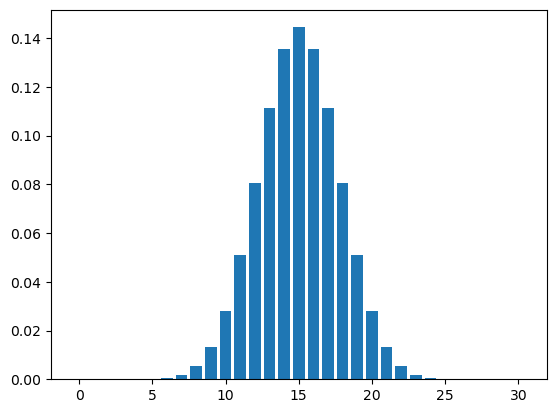

In [384]:
B = binom(K, p)
x = range(K+1)
mu_bin = B.pmf(x)
plt.bar(x,mu_bin)

In [14]:
mu_bin.T@P - mu_bin

array([-5.16987883e-25,  3.30872245e-24,  7.94093388e-22, -3.81164826e-21,
        3.38813179e-20, -1.08420217e-19,  1.08420217e-19,  6.50521303e-19,
       -3.46944695e-18, -1.21430643e-17,  2.08166817e-17,  5.55111512e-17,
       -1.38777878e-16,  1.94289029e-16, -2.22044605e-16,  3.05311332e-16,
       -2.49800181e-16,  2.35922393e-16, -1.52655666e-16,  1.52655666e-16,
       -1.04083409e-16,  3.64291930e-17, -4.33680869e-18,  1.73472348e-18,
        0.00000000e+00, -2.71050543e-20,  3.72694497e-20, -1.27054942e-21,
        1.16467030e-21,  4.30133919e-23,  2.27474668e-24])

On vérifie ainsi de $\mu_{bin}$ est une mesure invariante.

5\. <!--[$\cdot$/2]--> Implement a Python function `ehrenfest` to simulate a trajectory of the chain for a system of $K$ particles, for initial distribution $\mu$ (for instance a Dirac centered in $0$, meaning that the compartment $0$ is empty at $n = 0$). The maximum number of time steps will be controlled by an input parameter $n_{\max}$. Random number generation will be controlled by a [random number generator](https://numpy.org/doc/stable/reference/random/generator.html) passed as an input to the function.

For an efficient implementation, **do not use vector-matrix product with the transition matrix implemented in 3**: rely on the description of the system instead.


In [331]:
def tirer_dans_mu(mu):
    H = np.argwhere(np.cumsum(mu)<np.random.default_rng().random())
    if len(H)==0:
        return (0)
    return(np.max(H))
    
tirer_dans_mu(mu)

3

In [368]:
def ehrenfest(mu=15,Generator = np.random.default_rng(),nmax = 1000):
    state = mu
    Liste_Ehrenfest=[mu]

    for j in range(nmax):
        if Generator.random() < state/K:
            state+=-1
        else : 
            state+=1
        Liste_Ehrenfest.append(state)
    return(Liste_Ehrenfest)


6\. Simulate a trajectory of the chain starting in state $0$ for $n_{\max} = 5000$. Display the result in function of the time index $n$. Briefly describe the curve you obtained.

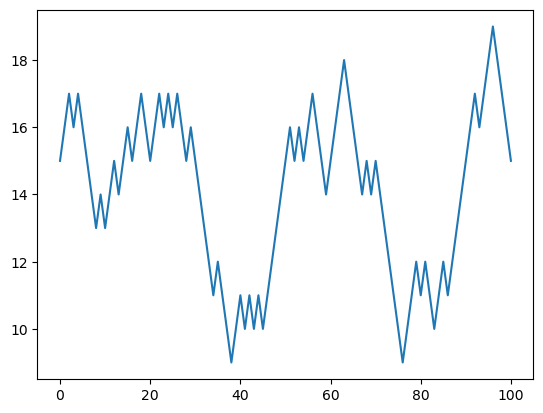

In [369]:
simulate_ehrenfest = ehrenfest(mu=0,Generator = np.random.default_rng(),nmax = 5000)
plt.plot(simulate_ehrenfest)

7\. Compare the empirical histogram of the trajectory obtained in 5. to the theoretical limit distribution $\pi$. What do you observe?

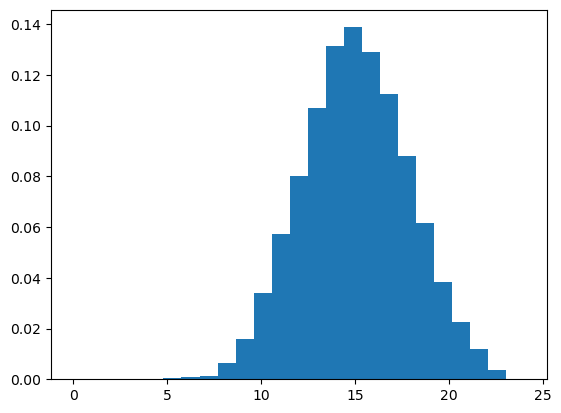

In [382]:
hist = plt.hist(simulate_ehrenfest,density=True,bins=K-5)

On observe à la limite la distribution semble décrire la distribution de la loi binomiale.

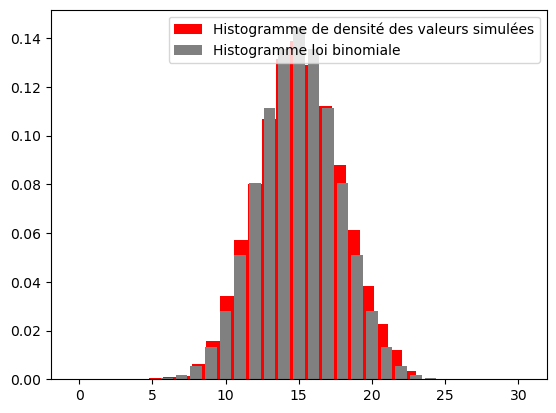

In [400]:
plt.hist(simulate_ehrenfest,density=True,bins=K-5,color="red",label="Histogramme de densité des valeurs simulées")
plt.bar(x,mu_bin,color = "grey",label="Histogramme loi binomiale")
plt.legend()
plt.show()

8\. a) Modify the function defined in 1. so that it returns the return time to state 0, defined as $T_{0,0} = \inf \bigl\{ n > 0, X(n) = 0 \mid X(0) = 0 \bigr\}$.

In [ ]:
def return_time_0(K=30,mu=15,retour=15,Generator = np.random.default_rng(),nmax = 1000):
    state = mu
    Liste_Ehrenfest=[mu]

    for j in range(nmax):
        if Generator.random() < state/K:
            state+=-1
        else : 
            state+=1
        Liste_Ehrenfest.append(state)
    return(Liste_Ehrenfest)


8\. b) [**Optional**] Run several chains (about 5, ideally in parallel) for $K = 10$, $n_{\max} = 5000$, and compare the empirical average of $T_{0,0}$ to $\pi(0)$. What do you observe?
 > Hint: a good tutorial showing how to run functions in parallel in Python is available [here](https://www.machinelearningplus.com/python/parallel-processing-python/).

8\. c) Comment on the possibility of numerically observing the chain returning to its initial state as $K$ increases.

...

---
## <a name="ex2">Exercise 2: Simulation of a discrete time homogeneous Markov chain</a> [(&#8593;)](#content)
 Let $\bigl( X(n) \bigr)_{n \in \mathbb{N}}$ be a discrete time homogeneous Markov chain defined by the following initial distribution $\mu$ and transition matrix $P$

$$
     \mu = [0, 1, 0, 0, 0, 0], 
     %
     \quad
     %
     P = \begin{pmatrix}
       1/2   & 1/2 &0  &0   &0   &0   \\
	 	1/4 &0   &0  &1/4 &1/4 &1/4   \\
       1/2   &0   &0  &0   &0   &1/2 \\
       0   &1/2 &0  &0   &1/2 &0   \\
       0   &1/3 &0  &1/3 &0   &1/3 \\
       0   &1/3 &1/3  & 0 &1/3   &0
     \end{pmatrix}.
 $$

1\. What can you say about the Markov chain $X$? (irreducibility, positive recurrence, periodicity, ...). Justify each of your claim, citing the relevant results from the lecture.

La chaine est irréductible car il existe une unique classe d'équivalence notée $C_{eq} = {1,2,3,4,5,6}$
En effet pour chaque couple i,j d'états, $\exists$ un chemin de $i->j$ avec $P(i->j)>0$

Cette classe d'équivalence est fermée donc elle est récurrente (une classe d'équivalence a soit tous ces états récurrents soit tous ces états transitoires), donc tous les états sont récurrents.

Cette chaine est de période 1.



2\. Write a function `simulate_dthmc` simulating the trajectory of the Markov chain $\bigl( X(n) \bigr)_{n \in \mathbb{N}}$ for $n_{\max}$ time steps. The signature of the function should include the following elements:
   - list of inputs: transition matrix $P$, initial distribution $\mu$, number of time steps $n_{\max}$, [random number generator](https://numpy.org/doc/stable/reference/random/generator.html);
   - output: array of lenght $n_{\max}$ representing the trajectory.
   
**To this end, do not use matrix vector products, which would lead to an extremely inefficient algorithm in this case.**
   

In [2]:
P = np.array([
        [0.2,0.7,0.1],
        [0.9,0,0.1],
        [0.2,0.8,0]])
distribution_init = [0,1,0]

In [3]:
import numpy as np
def simulate_dthmc(transitionMatrix,distribution,nMax=100,generator = np.random.default_rng(100)):
    generator = generator
    labelStates=np.array([i for i in range(0,len(distribution))])
    states = np.array([])
    states = np.append(states,int(np.argwhere(np.array(distribution)==1)[0]))   # initial State
    for step in range(1,nMax):
        next_state = np.random.choice(labelStates,p=P[int(states[step-1]),:])
        states=np.append(states,next_state)
    return states

3\. Simulate a trajectory of the chain for $n_{\max} = 2000$ starting from $X(0) = 1$. Plot the histogram of the states visited by the chain.
 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
nMax=2000
states = simulate_dthmc(transitionMatrix=P,distribution=distribution_init,nMax=nMax)
states=states.astype(int)

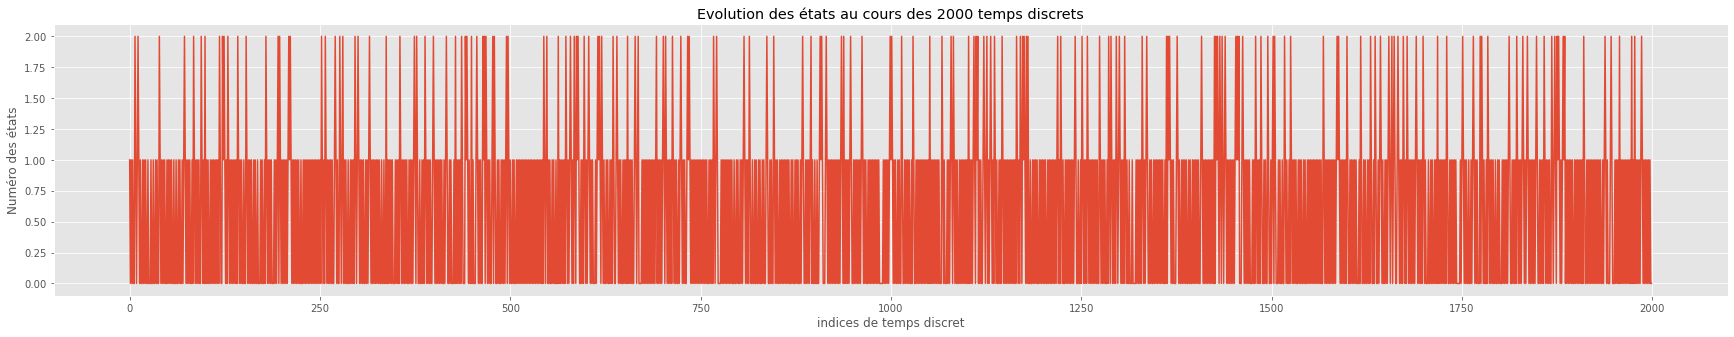

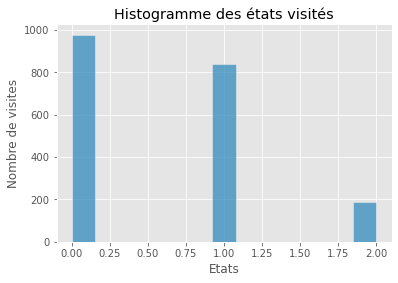

In [5]:
plt.style.use("ggplot")
plt.figure(figsize=(30,5))
plt.plot(states)
plt.xlabel("indices de temps discret")
plt.ylabel("Numéro des états")
plt.title(f"Evolution des états au cours des {nMax} temps discrets")


plt.figure()
plt.title("Histogramme des états visités")
plt.xlabel("Etats")
plt.ylabel("Nombre de visites")
sns.histplot(states)
plt.show()

4\. Determine numerically an invariant distribution $\boldsymbol{\pi}$ of the chain (*e.g.*, based on an eigendecomposition [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html)). Is it unique? Compare it to the histogram obtained in 2 (superimpose graphs). What can you conclude?
 

In [23]:
w,v=np.linalg.eig(P.T)
normalized_vector = np.real(v[0] / np.sum(v[0]))
print(f"Valeurs propres :                                       {w}")
print(f"Vecteur propre associé à la valeur propre 1 :           {v[0]}")
print(f"Vecteur propre associé à la valeur propre 1 normalisé : {normalized_vector}")
#plt.hist(normalized_vector)
#plt.hist(states,density=True)

Valeurs propres :                                       [ 1.  -0.7 -0.1]
Vecteur propre associé à la valeur propre 1 :           [-0.75529182 -0.70710678 -0.75482941]
Vecteur propre associé à la valeur propre 1 normalisé : [0.34064689 0.31891478 0.34043834]


5\. a) Compute $\mu_n \triangleq \mu P^n$, the probability distribution of $X(n)$. What is the limit of $\mu_n$ as $n$ goes to $+\infty$? Illustrate the result numerically.


In [7]:
def compute_distrib_n(TransitionMatrix=P,distribution=distribution_init,nstep=100):
    distribution_n = np.array([distribution_init])
    historyDistrib = []
    for step in range (0,nstep):
        distribution_n=np.dot(distribution_n,P)
        historyDistrib.append(distribution_n)
    return distribution_n,historyDistrib

In [8]:
nStep=50
distribution_n,history = compute_distrib_n(P,distribution_init,nstep=nStep)

La distribution au step 50 vaut : [[0.4919786  0.41711231 0.09090909]]


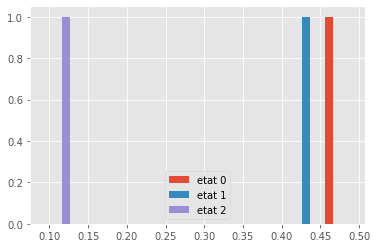

In [9]:
plt.hist(distribution_n,label=['etat 0','etat 1','etat 2'])
plt.legend()
print(f"La distribution au step {nStep} vaut : {distribution_n}")

5\. b) Display on the same graph the curves $n \mapsto \mu_n(i)$ for $i = 1, \dotsc , 6$, and compare with $\pi$. Display on another graph the function $n \mapsto \Vert \mu_n - \pi \Vert_1$, where $\Vert \cdot \Vert_1$ is the $\ell_1$ norm. What does each of these curves illustrate?
  

In [27]:
history = np.array(history)
history= history.reshape(50,3)

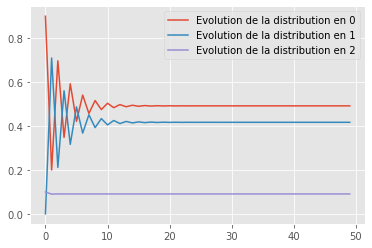

In [28]:
plt.figure()
plt.plot(history[:,0],label="Evolution de la distribution en 0")
plt.plot(history[:,1],label = "Evolution de la distribution en 1")
plt.plot(history[:,2],label = "Evolution de la distribution en 2")
plt.legend()

In [45]:
pi_vect = np.array([normalized_vector for i in range(0,nStep)])
diff = np.linalg.norm(history - pi_vect,ord=1,axis=1)

Text(0, 0.5, 'Norme l1 de la différence')

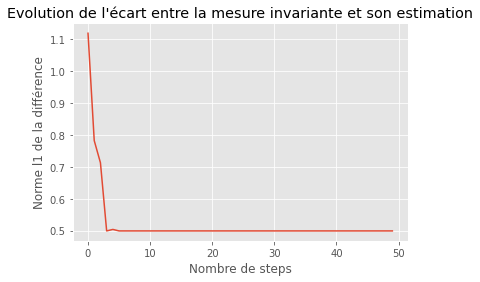

In [49]:
plt.figure()
plt.plot(diff)
plt.title("Evolution de l'écart entre la mesure invariante et son estimation")
plt.xlabel("Nombre de steps")
plt.ylabel("Norme l1 de la différence")
plt.show()

6\. For each state $i \in \{1, \dotsc, 5 \}$, simulate 100 trajectories starting from the state $i$ until the return time to $i$. For each state, compute the (empirical) average return time. Compare with its theoretical value.
 

In [11]:
def computeMoyenneReturn(positionOfReturn):
    n=len(positionOfReturn)
    tabNbStepReturn = []
    for i in range(1,n):
        tabNbStepReturn.append(positionOfReturn[i]-positionOfReturn[i-1])
    return np.mean(tabNbStepReturn)

In [12]:
MoyennePerState=[]
for state_considered in range(0,3):
     states = simulate_dthmc(transitionMatrix=P,distribution=distribution_init,nMax=nMax)
     positionOfReturn = []
     for step  in range(len(states)):
          if states[step]==state_considered:
               positionOfReturn.append(step)
     MoyennePerState.append(computeMoyenneReturn(positionOfReturn))

In [51]:
print(f"Le nombre moyen de retour pour chaque état est défini par (moyenne empirique)")
print(f"Moyenne du nombre de step pour le retour en 0 : {round(MoyennePerState[0],2)}")
print(f"Moyenne du nombre de step pour le retour en 1 : {round(MoyennePerState[1],2)}")
print(f"Moyenne du nombre de step pour le retour en 2 : {round(MoyennePerState[2],2)}")

Le nombre moyen de retour pour chaque état est défini par (moyenne empirique)
Moyenne du nombre de step pour le retour en 0 : 2.01
Moyenne du nombre de step pour le retour en 1 : 2.39
Moyenne du nombre de step pour le retour en 2 : 11.92
